# Outlier dan Anomaly
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

An unexpected change within these data patterns, or an event that does not conform to the expected data pattern, is considered an anomaly.

In [1]:
# Import Packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv("C:\\Users\\vegat\\Porto Data\\titanic\\titanic.csv")

## Outlier
Outliers are important because they can have a large influence on statistics derived from the dataset.

to see an outlier in data boxplot is usually used, for example;

<AxesSubplot:xlabel='Age'>

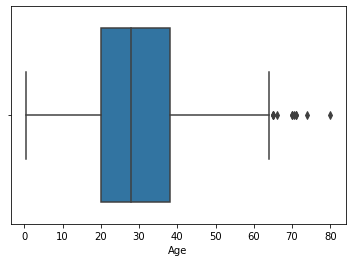

In [3]:
sns.boxplot(x="Age",data=df)

Here a boxplot of age in titanic dataset, outlier are data that not in range between lower bound and upper bound of data.

to calculate lower bound an upper bound we can use this formula;
* IQR = Q3 - Q1
* LowerBound = Q1 - 1.5*IRQ
* UpperBound = Q3 + 1.5*IRQ

Here the example;

In [4]:
# calculate Quantile
not_null = df['Age'][df["Age"].notnull()]
quantile_age = np.quantile(not_null, [0,0.25,0.5,0.75,1])
print(quantile_age)

[ 0.42  20.125 28.    38.    80.   ]


In [5]:
IQR = quantile_age[3]-quantile_age[1]
LowerBound = quantile_age[1] - (IQR*1.5)
UpperBound = quantile_age[3] + (IQR*1.5)
print("IQR: ",IQR)
print("LowerBound: ",LowerBound)
print("UpperBound: ",UpperBound)

IQR:  17.875
LowerBound:  -6.6875
UpperBound:  64.8125


## Outlier Handling
Because outlier have a large influence on statistics derived from the dataset it usually removed if the data used for machine learning and other stuff.

to do that we can select data that in the range between lower bound and upper bound of data, here the example;

In [6]:
df_new = df["Age"][(df["Age"] > LowerBound)&(df["Age"] < UpperBound)]
print(df_new)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 703, dtype: float64


## Missing Value Handling
The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.

to see missing value in dataset we can use;

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here Age, Cabin, and Embarked have missing values, the handling of this missing values is diffrent based on numerical or categorocal values of the data.

### Numerical

To handle numerical missing values usually the median of data is used to fill the missing values, here an example;

In [10]:
# check the median
df["Age"].median()

28.0

In [8]:
# input data to null values
val = df["Age"].median()
df["Age"]=df.Age.fillna(val)

In [9]:
# check null data
df["Age"].isnull().sum()

0

The null data of Age is fill with 28 as the median and the null values now is 0 occurence.

### Categorical

To handle categorocal missing values usually the mode of data is used to fill the missing values, here an example;

In [12]:
# check the mode
df["Embarked"].mode().values[0]

'S'

In [13]:
# input data to null values
val = df["Embarked"].mode().values[0]
df["Embarked"]=df.Embarked.fillna(val)

In [14]:
# check null data
df["Embarked"].isnull().sum()

0

The null data of Embarked is fill with 'S' as the mode and the null values now is 0 occurence.